In [ ]:
################################################################################
# Author 1:      Firstname Lastname
# MatNr 1:       01234567
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Jakob Marktl
# MatNr 3:       12335939
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pycountry
import pycountry_convert

Alles in einem File, programmieren

Robert:

David:

In [1]:
print("David hat was gemacht")

David hat was gemacht


Jakob:

['Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'China (People’s Republic of)', 'China (People’s Republic of)', 'China (People’s Republic of)', 'China (People’s Republic of)', 'China (People’s Republic of)', 'China (People’s Republic

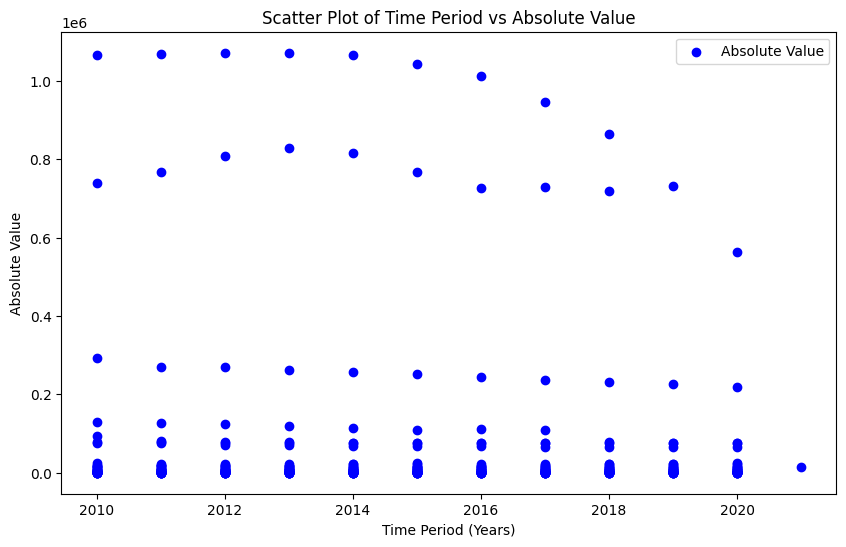

In [39]:
FishBoats = pd.read_csv('Fish_Boote.csv')
FishInland = pd.read_csv('Fish_Inland.csv')

FishBoatsSorted = FishBoats.sort_values(by='Reference area', ascending=True)
referenceArea = FishBoatsSorted['Reference area'].tolist()
timePeriod = FishBoatsSorted['TIME_PERIOD'].tolist()
obsValue = FishBoatsSorted['OBS_VALUE'].tolist()
print(referenceArea, timePeriod, obsValue)

plt.figure(figsize=(10,6))
plt.scatter(timePeriod, obsValue, c='blue', label='Absolute Value')

# Add labels and title
plt.xlabel('Time Period (Years)')
plt.ylabel('Absolute Value')
plt.title('Scatter Plot of Time Period vs Absolute Value')

plt.legend()
plt.show()



df = pd.DataFrame({
    'Country': referenceArea,
    'Absolute_Value': obsValue
})

# Create a scatter plot using Plotly
fig = px.scatter(df, x='Country', y='Absolute_Value', 
                 title="Scatter Plot of Time Period vs Absolute Value",
                 labels={'Time_Period': 'Time Period (Years)', 'Absolute_Value': 'Absolute Value'})

# Show the plot
fig.show()